# 2018.11.01: Network inference from time series of categorical variables

In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import inference

In [2]:
# setting parameter:
np.random.seed(1)

n = 20 # number of positions
m = 5 # number of values at each position
l = int(4*((n*m)**2)) # number of samples
g = 1.

In [3]:
w0 = inference.generate_interactions(n,m,g)

In [4]:
s = inference.generate_sequences(w0,n,m,l)

## Large sample sizes

### Additive update

In [5]:
w1 = inference.fit_additive(s,n,m)

inference.py:189: RuntimeWarning: overflow encountered in exp
  p = np.exp(h)
inference.py:193: RuntimeWarning: invalid value encountered in divide
  p[:,k] = p[:,k]/p_sum[:]


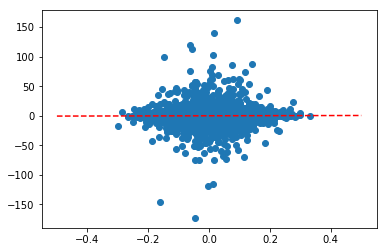

In [6]:
plt.scatter(w0,w1)
plt.plot([-0.5,0.5],[-0.5,0.5],'r--')

In [7]:
mse = ((w0-w1)**2).mean()
print(mse)

nan


### Multiplicative update

plt.scatter(w0,w1)
plt.plot([-0.5,0.5],[-0.5,0.5],'r--')

In [8]:
w2 = inference.fit_multiplicative(s,n,m)

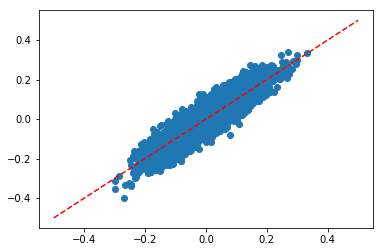

In [9]:
plt.scatter(w0,w2)
plt.plot([-0.5,0.5],[-0.5,0.5],'r--')

In [10]:
mse = ((w0-w2)**2).mean()
print(mse)

0.0011931578506519155


## Small sample sizes

In [11]:
l2 = int(0.5*(n*m)**2)

### Additive update

In [12]:
w1 = inference.fit_additive(s[:l2],n,m)

('MSE by additive update:', 0.01197806536865491)


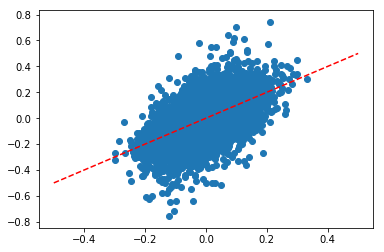

In [13]:
plt.scatter(w0,w1)
plt.plot([-0.5,0.5],[-0.5,0.5],'r--')
mse = ((w0-w1)**2).mean()
print('MSE by additive update:',mse)

### Multiplicative update

In [14]:
w = inference.fit_multiplicative(s[:l2],n,m)

('MSE by multiplicative update:', 0.0037262503133454624)


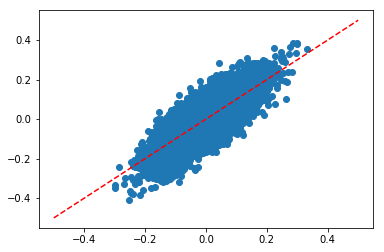

In [15]:
plt.scatter(w0,w)
plt.plot([-0.5,0.5],[-0.5,0.5],'r--')
mse = ((w0-w)**2).mean()
print('MSE by multiplicative update:',mse)